Problem Satement
xyz cos 2014-2018 sales data to identify key revenue and profit drives across products, channels, and regions, uncover seasonal trends and outliers and align performane  against budgets. use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 sheets=pd.read_excel('Regional Sales Dataset.xlsx',sheet_name=None)

In [3]:
#Assign dataframes to each sheet
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']


In [4]:
print("df_sales shape: ",(df_sales.shape))
print("df_customers shape: ",(df_customers.shape))
print("df_products shape: ",(df_products.shape))
print("df_regions shape: ",(df_regions.shape))
print("df_state_reg shape: ",(df_state_reg.shape))
print("df_budgets shape: ",(df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [5]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [11]:
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [12]:
#checking for null values
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [13]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [14]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [15]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [16]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [17]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

Data Cleaning and wrangling

In [18]:
#Merge with customers
df=df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [19]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [20]:
df.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
Customer Index               0
Customer Names               0
dtype: int64

In [21]:
df=df.drop('Customer Index',axis=1)

In [22]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,Deseret Group


In [23]:
#Merge with Products
df=df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [24]:
df=df.drop('Index',axis=1)

In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,Deseret Group,Product 8


In [26]:
df=df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)



In [27]:
df=df.drop('id',axis=1)

In [28]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [29]:
df=df.merge(
    df_state_reg,
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [30]:
df['Product Name']

0        Product 27
1        Product 20
2        Product 26
3         Product 7
4         Product 8
            ...    
64099    Product 26
64100    Product 21
64101    Product 13
64102    Product 20
64103    Product 15
Name: Product Name, Length: 64104, dtype: object

In [31]:
df=df.merge(
    df_budgets,
    how='left',
    left_on='Product Name',
    right_on='Product Name'
)

In [32]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,population,households,median_income,land_area,water_area,time_zone,State Code,State,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast,1085037.329


In [33]:
df.columns.value_counts()

OrderNumber                  1
OrderDate                    1
Customer Name Index          1
Channel                      1
Currency Code                1
Warehouse Code               1
Delivery Region Index        1
Product Description Index    1
Order Quantity               1
Unit Price                   1
Line Total                   1
Total Unit Cost              1
Customer Names               1
Product Name                 1
name                         1
county                       1
state_code                   1
state                        1
type                         1
latitude                     1
longitude                    1
area_code                    1
population                   1
households                   1
median_income                1
land_area                    1
water_area                   1
time_zone                    1
State Code                   1
State                        1
Region                       1
2017 Budgets                 1
Name: co

In [34]:
#clean up redundant columns
cols_to_drop=['State Code','State']
df=df.drop(columns=cols_to_drop,errors='ignore')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [35]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [36]:
#convert all columns to lower case 
df.columns=df.columns.str.lower()

In [37]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [38]:
#columns to keep
cols_to_keep=[
    'ordernumber',
    'orderdate',
    'channel',
    'warehouse code',
    'order quantity',
    'unit price',
    'line total',
    'county',
    'total unit cost', 
    'customer names', 
    'product name',
    'state_code', 
    'state',
    'latitude',
    'longitude',
    'region',
    '2017 budgets'
]

In [39]:
df=df[cols_to_keep]

In [40]:
df.head(1)

,ordernumber,orderdate,channel,warehouse code,order quantity,unit price,line total,county,total unit cost,customer names,product name,state_code,state,latitude,longitude,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,Chatham County,1824.343,Rhynoodle Ltd,Product 27,GA,Georgia,32.08354,-81.09983,South,964940.231


In [41]:
#Rename the columns
df=df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'warehouse code':'warehouse_code',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'total_unit_cost',
    'customer names':'customer_names',
    'product name':'product_name',
    'state_code':'state',
    'state':'state_name',
    'latitude':'lat',
    'longitude':'lon',
    '2017 budgets':'budget'
})


In [42]:
df.head(1)

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,county,total_unit_cost,customer_names,product_name,state,state_name,lat,lon,region,budget
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,Chatham County,1824.343,Rhynoodle Ltd,Product 27,GA,Georgia,32.08354,-81.09983,South,964940.231


In [43]:
#Blank out budgets for non 2017 orders
df.loc[df['order_date'].dt.year != 2017,'budget']=pd.NA
df[['order_date','product_name','revenue','budget']].head(3)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN


In [44]:
df.loc[df['order_date'].dt.year == 2017,'budget'].head(5)

46363    1011609.684
46364    3720639.645
46365    3299478.315
46366    1085037.329
46367    3050087.565
Name: budget, dtype: float64

In [45]:
df_2017=df[df['order_date'].dt.year==2017]

In [46]:
df_2017.head(2)

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,county,total_unit_cost,customer_names,product_name,state,state_name,lat,lon,region,budget
46363,SO - 0002544,2017-01-01,Wholesale,NXH382,6,1239.5,7437.0,Hudson County,1028.785,NCS Group,Product 30,NJ,New Jersey,40.77955,-74.02375,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,NXH382,5,1829.1,9145.5,Mesa County,1207.206,Epic Group,Product 13,CO,Colorado,39.06387,-108.55065,West,3720639.645


In [47]:
df_2017.isnull().sum()

order_number       0
order_date         0
channel            0
warehouse_code     0
order_quantity     0
unit_price         0
revenue            0
county             0
total_unit_cost    0
customer_names     0
product_name       0
state              0
state_name         0
lat                0
lon                0
region             0
budget             0
dtype: int64

Feature Engineering

In [48]:
df.head(1)

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,county,total_unit_cost,customer_names,product_name,state,state_name,lat,lon,region,budget
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,Chatham County,1824.343,Rhynoodle Ltd,Product 27,GA,Georgia,32.08354,-81.09983,South,NaN


In [49]:
df['total_cost']=df['order_quantity']* df['total_unit_cost']

In [50]:
df['profit']=df['revenue']-df['total_cost']

In [51]:
df.head(2)

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,county,total_unit_cost,customer_names,product_name,state,state_name,lat,lon,region,budget,total_cost,profit
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,Chatham County,1824.343,Rhynoodle Ltd,Product 27,GA,Georgia,32.08354,-81.09983,South,NaN,10946.058,4048.542
1,SO - 0003378,2014-01-01,Distributor,AXW291,11,2351.7,25868.7,Johnson County,1269.918,Thoughtmix Ltd,Product 20,IN,Indiana,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602


In [52]:
df['profit_margin_pct']=(df['profit']/df['revenue'])*100

In [53]:
df.head(2)

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,county,total_unit_cost,customer_names,product_name,state,state_name,lat,lon,region,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,Chatham County,1824.343,Rhynoodle Ltd,Product 27,GA,Georgia,32.08354,-81.09983,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,AXW291,11,2351.7,25868.7,Johnson County,1269.918,Thoughtmix Ltd,Product 20,IN,Indiana,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602,46.0


EDA

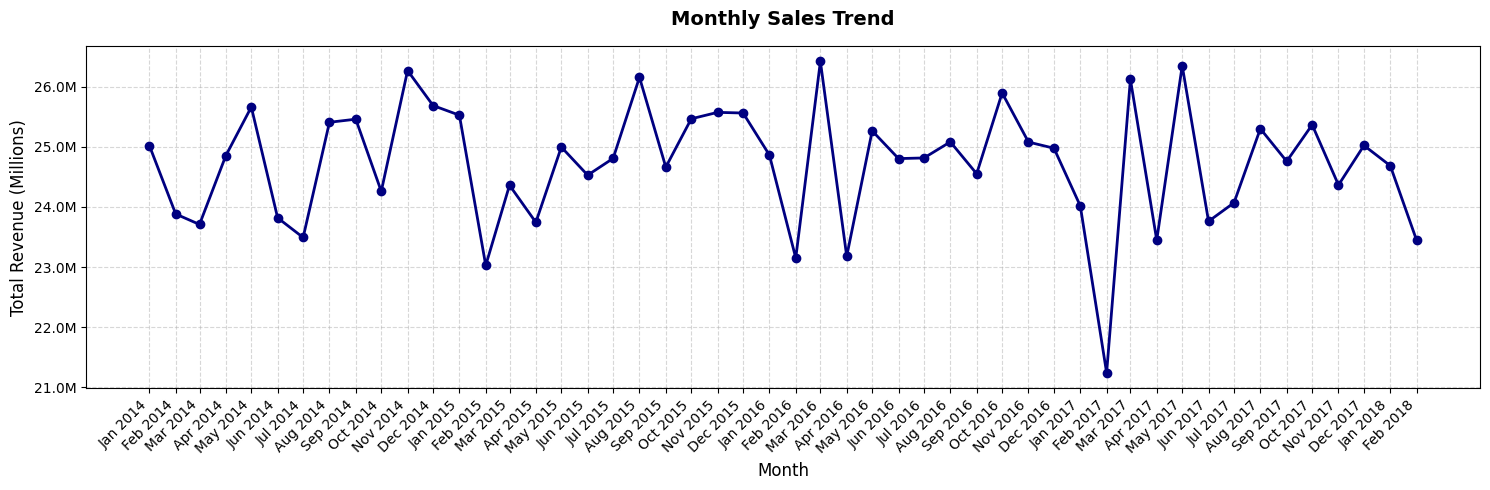

In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(15, 5))
plt.plot(
    monthly_sales.index,
    monthly_sales.values,
    marker='o',
    color='navy',
    linewidth=2,
    markersize=6
)
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(
    ticks=monthly_sales.index,  # every timestamp
    labels=[d.strftime('%b %Y') for d in monthly_sales.index],  # e.g. 'Jan 2024'
    rotation=45,
    ha='right'
)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


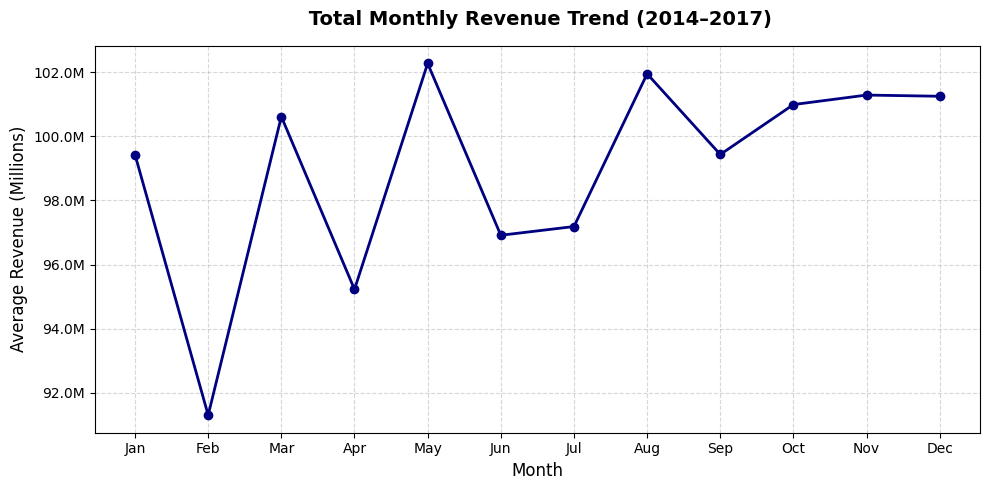

In [55]:
#Total Monthly Revenue Trend
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df_new = df[~((df['year'] == 2018) & (df['month'].isin([1, 2])))]
monthly_avg = (
    df_new.groupby('month')['revenue']
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_avg['month'],
    monthly_avg['revenue'],
    color='navy',
    marker='o',
    linewidth=2,
    markersize=6
)

formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.title(' Total Monthly Revenue Trend (2014–2017)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Revenue (Millions)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [67]:
df_new['month_name'] = df_new['order_date'].dt.month_name()
df_new['month_name']


C:\Users\USER\AppData\Local\Temp\ipykernel_5572\3805525929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month_name'] = df_new['order_date'].dt.month_name()


0         January
1         January
2         January
3         January
4         January
           ...   
61621    December
61622    December
61623    December
61624    December
61625    December
Name: month_name, Length: 61626, dtype: object

In [69]:
df_new.to_excel('sales report_2014_2017.xlsx',index=False)

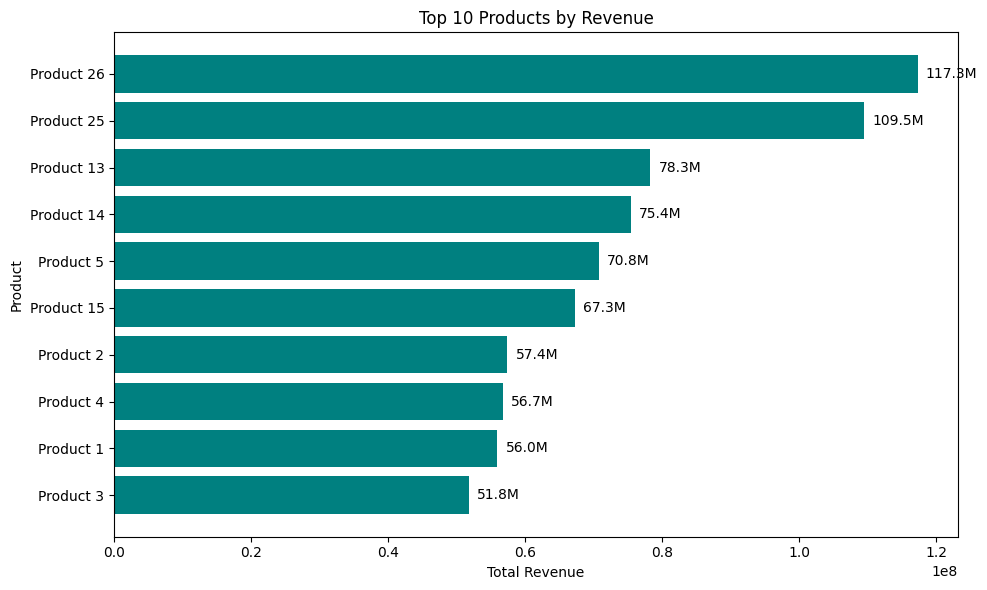

In [56]:
#Top 10 products by revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(top10_products['product_name'], top10_products['revenue'], color='teal')
for bar in bars:
    width = bar.get_width()  
    plt.text(width + 0.01*top10_products['revenue'].max(),  
             bar.get_y() + bar.get_height()/2, 
             f'{width/1e6:.1f}M', 
             va='center', ha='left', fontsize=10)
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

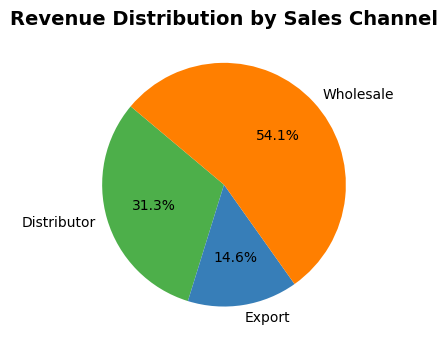

In [57]:
#Sales Revenue by Channel
channel_revenue = df.groupby('channel')['revenue'].sum()
plt.figure(figsize=(4, 4))
plt.pie(
    channel_revenue, 
    labels=channel_revenue.index, 
    autopct='%1.1f%%', 
    startangle=140,    
    colors=['#4daf4a','#377eb8','#ff7f00','#984ea3','#e41a1c'] 
)
plt.title('Revenue Distribution by Sales Channel', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

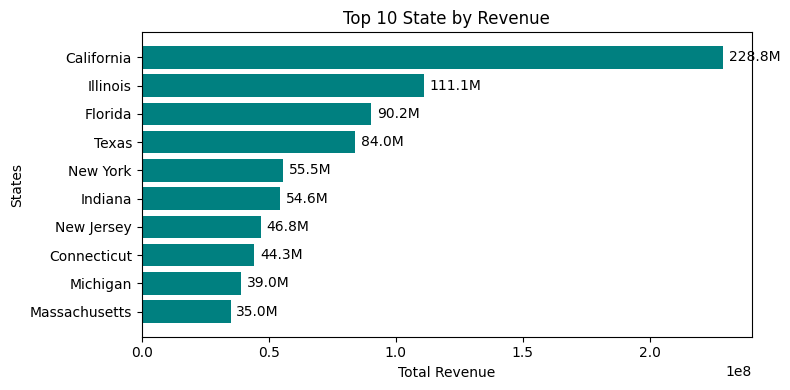

In [58]:
#Top 10 State by revenue
state_revenue = df.groupby('state_name')['revenue'].sum().reset_index()
top10_state = state_revenue.sort_values(by='revenue', ascending=False).head(10)
plt.figure(figsize=(8, 4))
bars = plt.barh(top10_state['state_name'], top10_state['revenue'], color='teal')
for bar in bars:
    width = bar.get_width()  
    plt.text(width + 0.01*top10_state['revenue'].max(),  
             bar.get_y() + bar.get_height()/2, 
             f'{width/1e6:.1f}M', 
             va='center', ha='left', fontsize=10)
plt.xlabel('Total Revenue')
plt.ylabel('States')
plt.title('Top 10 State by Revenue')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5572\1077956781.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(unit_price_data, labels=top_products, patch_artist=True, medianprops=dict(color='red'))


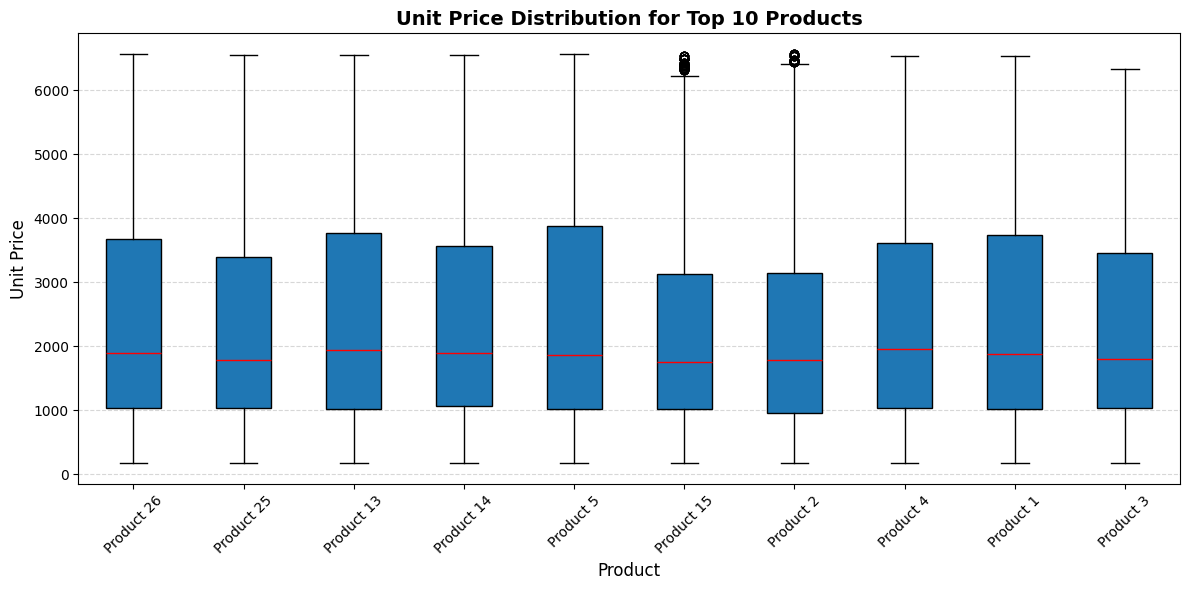

In [59]:
#Unit price distribution per product
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10).index
df_top = df[df['product_name'].isin(top_products)]
unit_price_data = [df_top[df_top['product_name'] == product]['unit_price'] for product in top_products]
plt.figure(figsize=(12, 6))
plt.boxplot(unit_price_data, labels=top_products, patch_artist=True, medianprops=dict(color='red'))
plt.title('Unit Price Distribution for Top 10 Products', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

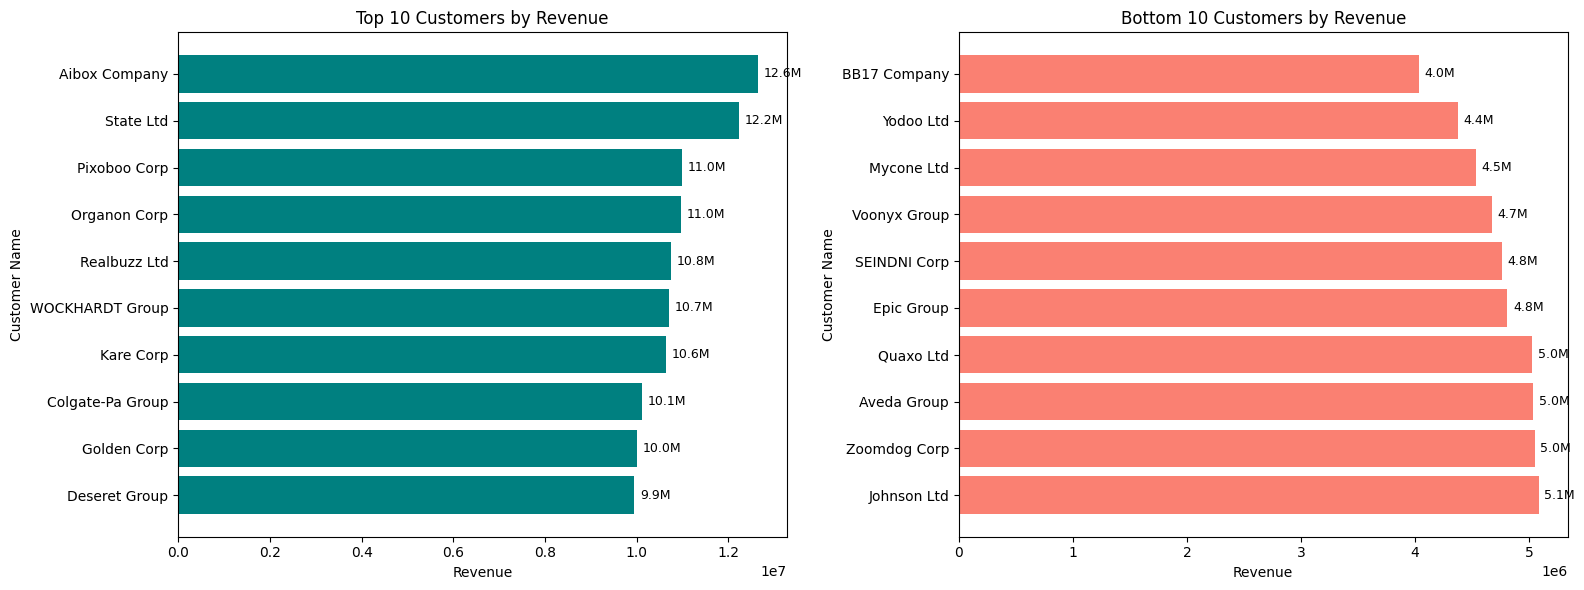

In [60]:
#Top10 and bottom10 customers by revenue
customer_revenue = df.groupby('customer_names')['revenue'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='revenue', ascending=False)

top10_customers = customer_revenue.head(10)
bottom10_customers = customer_revenue.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
plt.subplots_adjust(wspace=0.6)  

bars = axes[0].barh(top10_customers['customer_names'], top10_customers['revenue'], color='teal')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Customer Name')
axes[0].set_title('Top 10 Customers by Revenue')
axes[0].invert_yaxis()

for bar in bars:
    width = bar.get_width()
    axes[0].text(width + 0.01 * top10_customers['revenue'].max(),
                 bar.get_y() + bar.get_height()/2,
                 f'{width/1e6:.1f}M',
                 va='center', ha='left', fontsize=9)

bars = axes[1].barh(bottom10_customers['customer_names'], bottom10_customers['revenue'], color='salmon')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Customer Name')
axes[1].set_title('Bottom 10 Customers by Revenue')


for bar in bars:
    width = bar.get_width()
    axes[1].text(width + 0.01 * bottom10_customers['revenue'].max(),
                 bar.get_y() + bar.get_height()/2,
                 f'{width/1e6:.1f}M',
                 va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

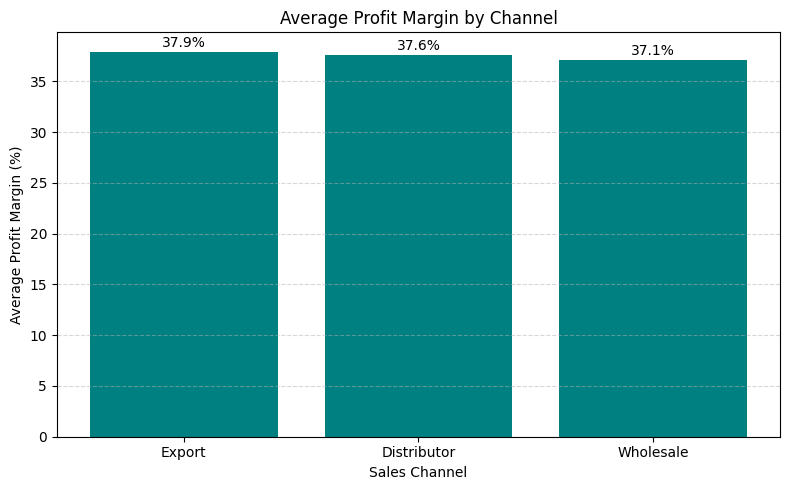

In [61]:
#Average profit margin by channel
avg_profit_margin= df.groupby('channel')['profit_margin_pct'].mean().reset_index()
avg_profit_margin=avg_profit_margin.sort_values(by='profit_margin_pct', ascending=False)
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_profit_margin['channel'], avg_profit_margin['profit_margin_pct'], color='teal')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Average Profit Margin by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Profit Margin (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

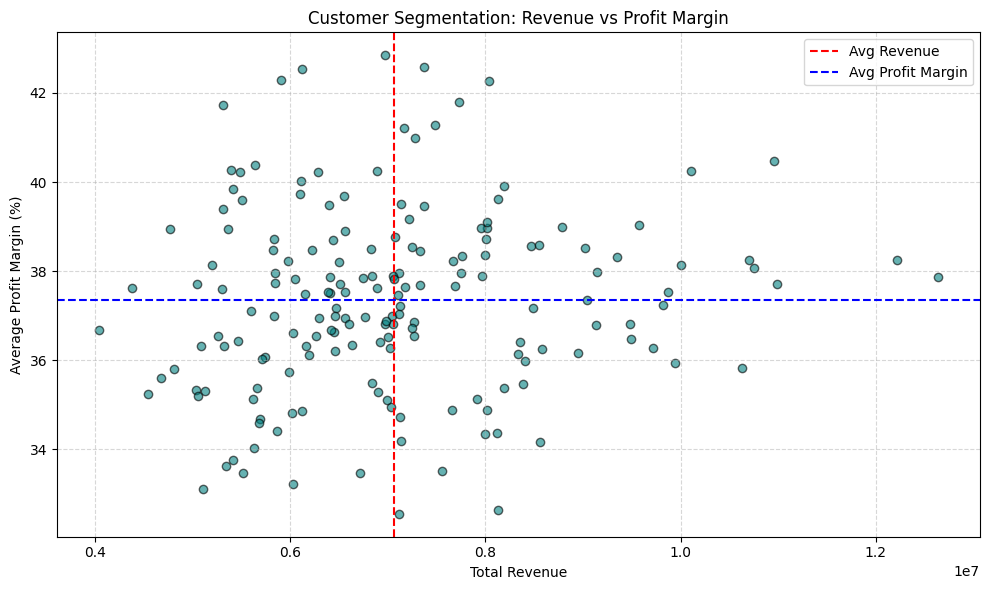

In [62]:
#Customer Segmentation: Revenue vs Profit Margin
customer_seg=df.groupby('customer_names').agg({
    'revenue':'sum',
    'profit_margin_pct':'mean'
    
}).reset_index()
plt.figure(figsize=(10,6))
plt.scatter(customer_seg['revenue'],customer_seg['profit_margin_pct'],color='teal',alpha=0.6,edgecolors='black')
plt.title('Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvline(customer_seg['revenue'].mean(), color='red', linestyle='--', label='Avg Revenue')
plt.axhline(customer_seg['profit_margin_pct'].mean(), color='blue', linestyle='--', label='Avg Profit Margin')
plt.legend()
plt.tight_layout()
plt.show()

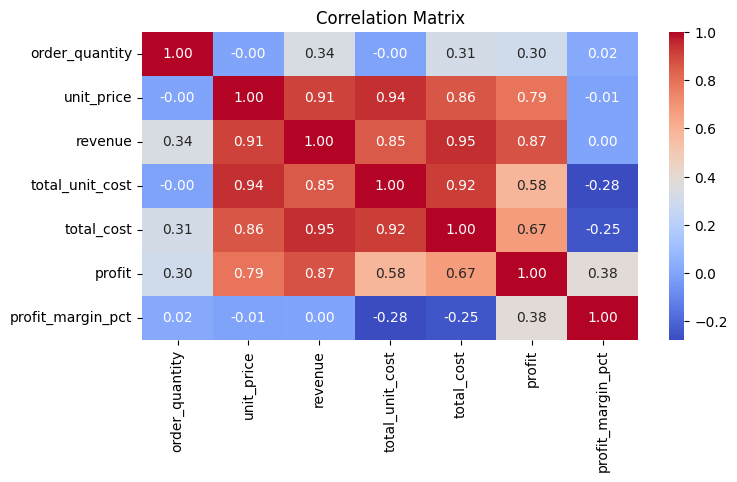

In [63]:
#correlation matrix
numeric_cols = [
    'order_quantity', 'unit_price', 'revenue', 'total_unit_cost',
     'total_cost', 'profit', 'profit_margin_pct'
]
df_numeric=df[numeric_cols]
corr_matrix=df_numeric.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [64]:
df['month_name'] = df['order_date'].dt.month_name()


       order_number order_date      channel warehouse_code  order_quantity  \
0       SO - 000225 2014-01-01    Wholesale         AXW291               6   
1      SO - 0003378 2014-01-01  Distributor         AXW291              11   
2      SO - 0005126 2014-01-01    Wholesale         AXW291               6   
3      SO - 0005614 2014-01-01       Export         AXW291               7   
4      SO - 0005781 2014-01-01    Wholesale         AXW291               8   
...             ...        ...          ...            ...             ...   
64099  SO - 0007573 2018-02-28    Wholesale         AXW291              12   
64100  SO - 0007706 2018-02-28       Export         NXH382               6   
64101  SO - 0007718 2018-02-28  Distributor         AXW291              11   
64102  SO - 0008084 2018-02-28  Distributor         AXW291               7   
64103  SO - 0008654 2018-02-28  Distributor         AXW291               8   

       unit_price  revenue             county  total_unit_cost 